In [18]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, StackingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


from sklearn.datasets import load_breast_cancer

pd.set_option("display.max_columns", None)
plt.rcParams["figure.figsize"] = (25, 25)

In [19]:
RANDOM_SEED=2023

In [20]:
X,Y=load_breast_cancer(return_X_y=True,as_frame=True)
X.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,random_state=RANDOM_SEED)

In [22]:
scaler=MinMaxScaler()
pca=PCA(random_state=RANDOM_SEED)
estimator=[
    ('scaler',scaler),
    ('pca',pca)
]
pipe=Pipeline(estimator)
X_train_fin=pipe.fit_transform(X_train)
X_test_fin=pipe.transform(X_test)
X_train_fin.shape

(455, 30)

[Text(0.5735294117647058, 0.9, 'x[22] <= 115.35\ngini = 0.467\nsamples = 455\nvalue = [169, 286]'),
 Text(0.3235294117647059, 0.7, 'x[27] <= 0.147\ngini = 0.178\nsamples = 314\nvalue = [31, 283]'),
 Text(0.17647058823529413, 0.5, 'x[20] <= 17.54\ngini = 0.08\nsamples = 289\nvalue = [12, 277]'),
 Text(0.11764705882352941, 0.3, 'x[27] <= 0.118\ngini = 0.067\nsamples = 287\nvalue = [10, 277]'),
 Text(0.058823529411764705, 0.1, '\n  (...)  \n'),
 Text(0.17647058823529413, 0.1, '\n  (...)  \n'),
 Text(0.23529411764705882, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.47058823529411764, 0.5, 'x[21] <= 23.74\ngini = 0.365\nsamples = 25\nvalue = [19, 6]'),
 Text(0.35294117647058826, 0.3, 'x[7] <= 0.087\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.29411764705882354, 0.1, '\n  (...)  \n'),
 Text(0.4117647058823529, 0.1, '\n  (...)  \n'),
 Text(0.5882352941176471, 0.3, 'x[23] <= 492.25\ngini = 0.1\nsamples = 19\nvalue = [18, 1]'),
 Text(0.5294117647058824, 0.1, '\n  (...)  \n'

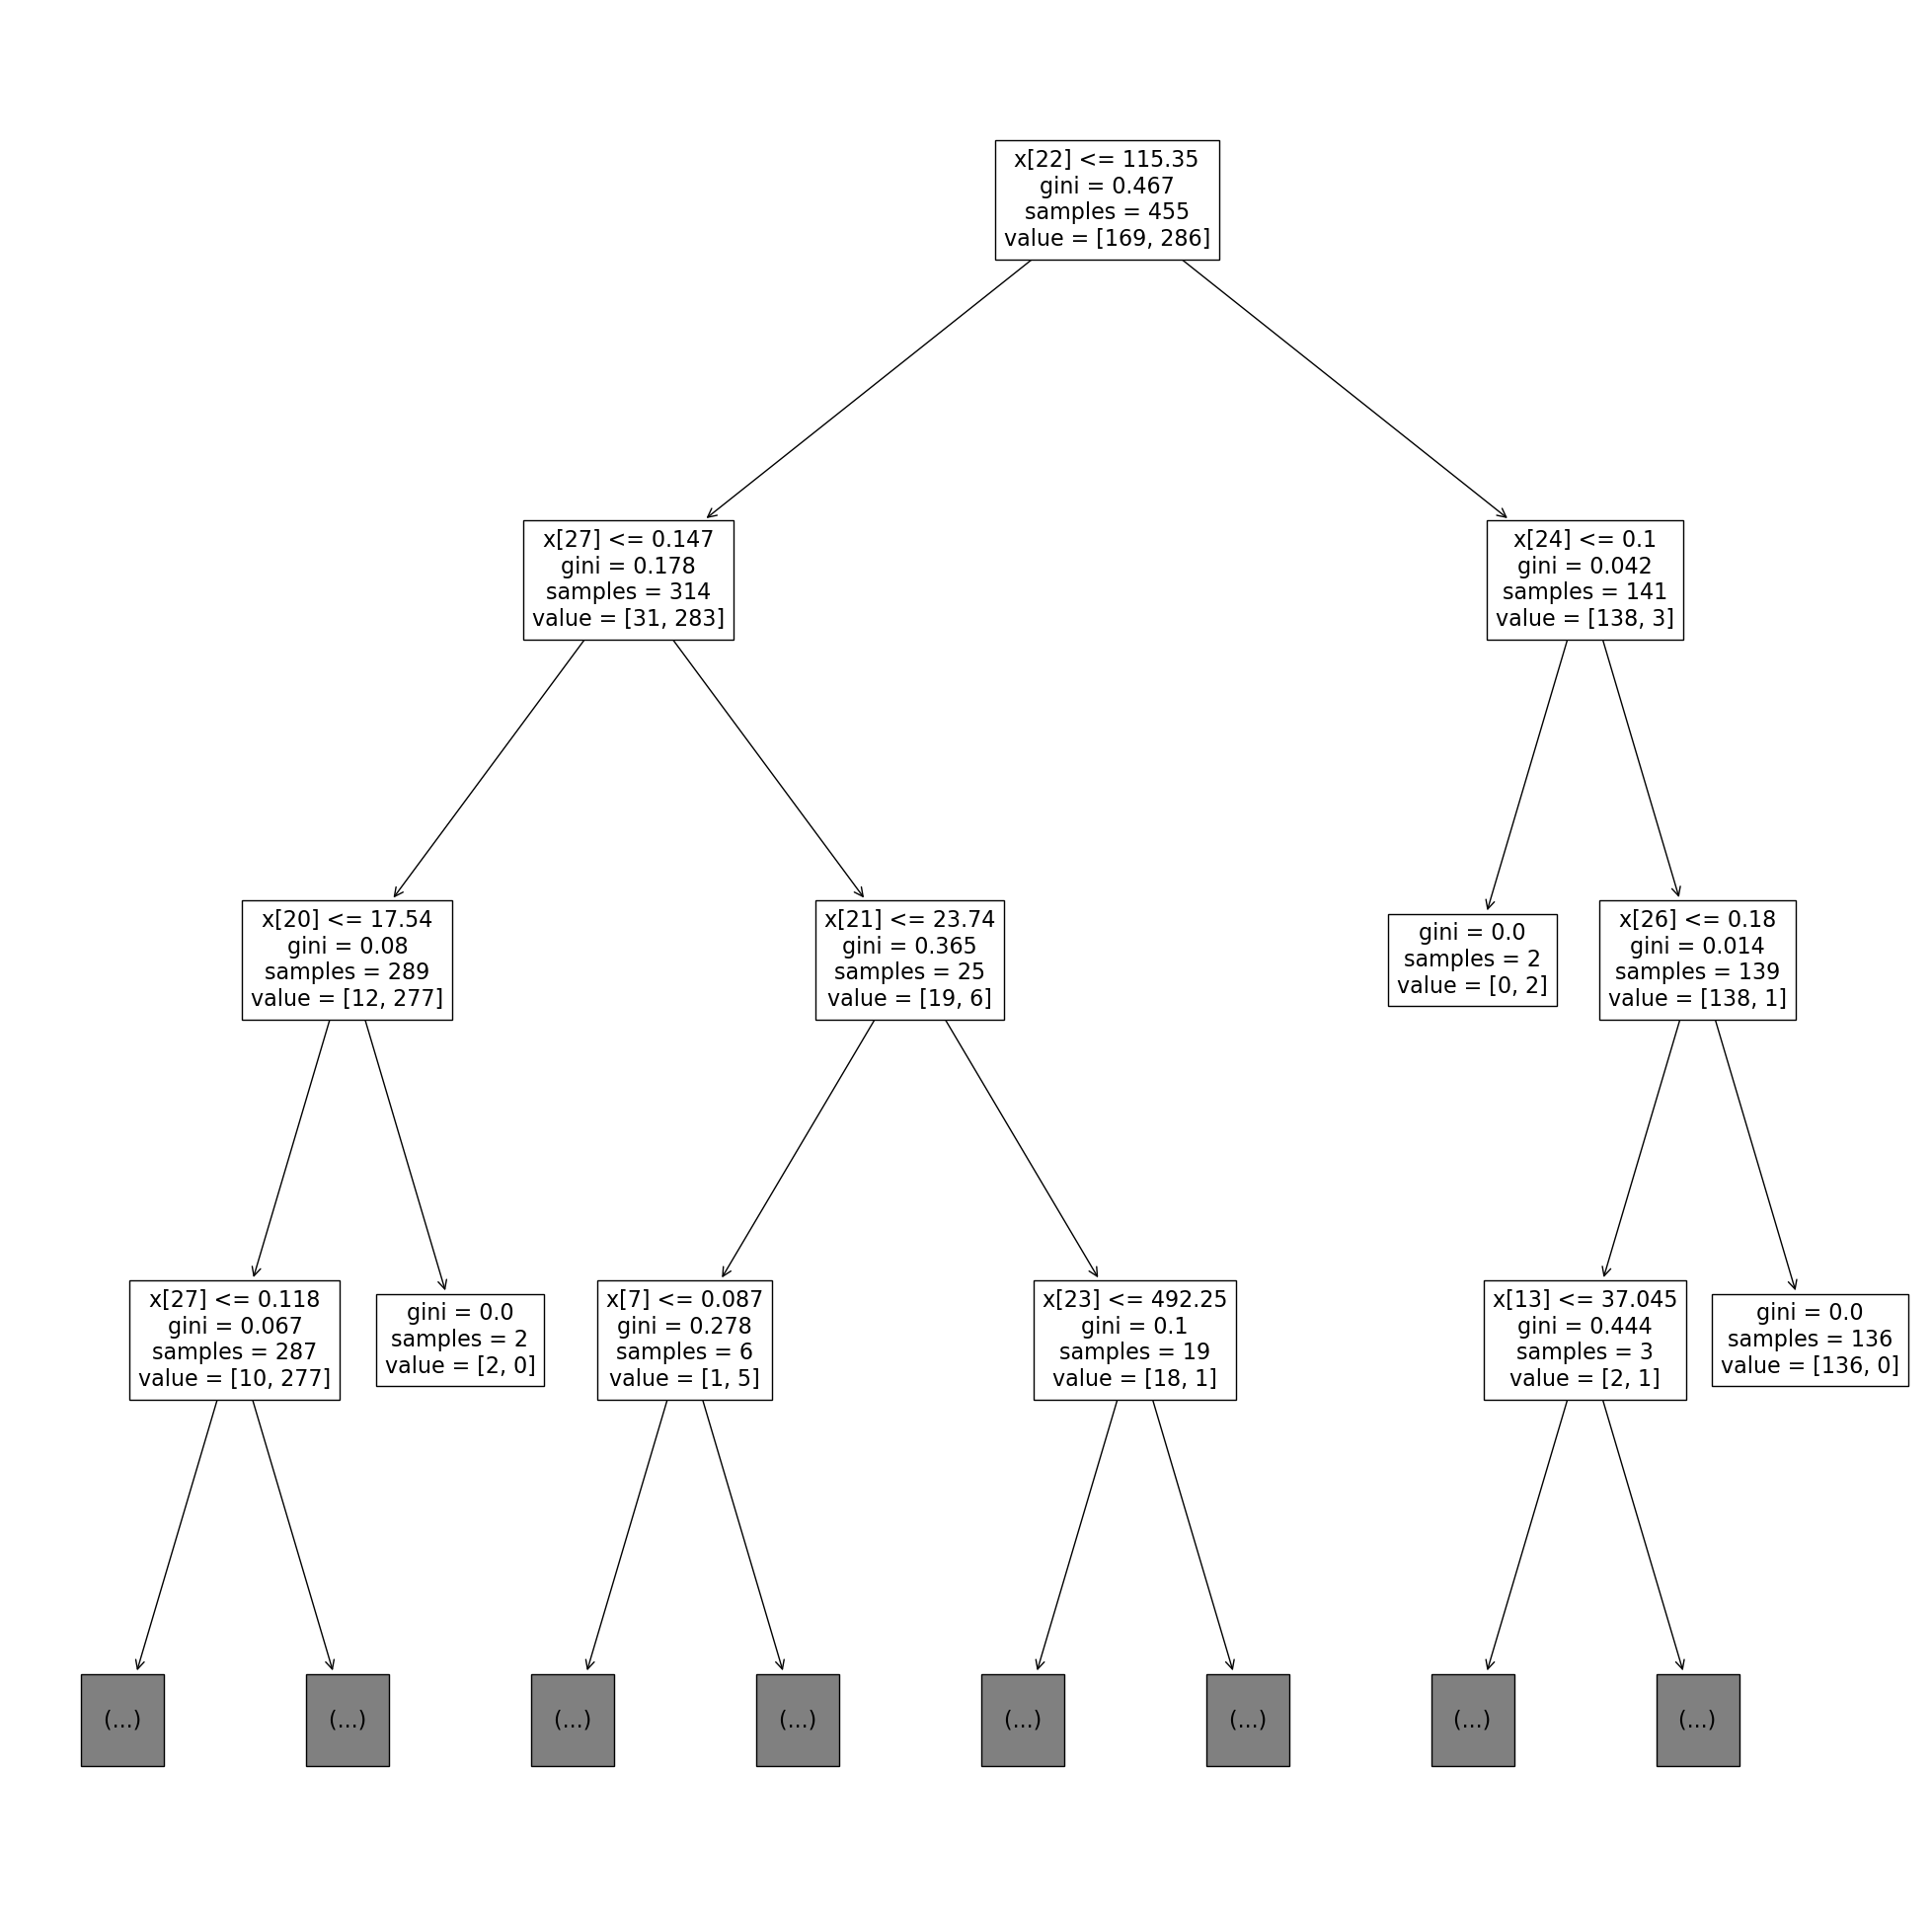

In [23]:
clf=DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=RANDOM_SEED)
clf.fit(X_train,Y_train)
plot_tree(clf,max_depth=3)

In [39]:
Y_pred=clf.predict(X_test_fin)
print(f1_score(Y_test,Y_pred,average='macro'))


0.3837837837837838


c:\Users\tanya\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [28]:
clf=BaggingClassifier(estimator=SVC(),n_estimators=10,random_state=RANDOM_SEED)
clf.fit(X_train,Y_train)

BaggingClassifier(estimator=SVC(), random_state=2023)

In [29]:
Y_pred=clf.predict(X_test_fin)
print(f1_score(Y_test,Y_pred,average='macro'))


0.3837837837837838


c:\Users\tanya\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


In [30]:
clf=RandomForestClassifier(n_estimators=200,random_state=RANDOM_SEED)
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test_fin)
print(f1_score(Y_test,Y_pred,average='macro'))


0.3837837837837838


c:\Users\tanya\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [31]:
estimator=[
    ('rf',RandomForestClassifier(random_state=RANDOM_SEED)),
    ('knn',KNeighborsClassifier()),
    ('svc',SVC())
]
clf=StackingClassifier(estimators=estimator,final_estimator=LogisticRegression())
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test_fin)
print(f1_score(Y_test,Y_pred,average='macro'))


0.3837837837837838


c:\Users\tanya\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\tanya\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\tanya\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [33]:
clf=GradientBoostingClassifier(n_estimators=200,random_state=RANDOM_SEED)
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test_fin)
print(f1_score(Y_test,Y_pred,average='macro'))



0.3837837837837838


c:\Users\tanya\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
